In [1]:
import prepare_dataset as prd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import open3d as o3d
import numpy as np
import os
import RANSAC
import icp 
import time
import correspondence as corr
import visualization as vis
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import features_explore as f


Text(0.5, 1.0, 'FPFH Matrix')

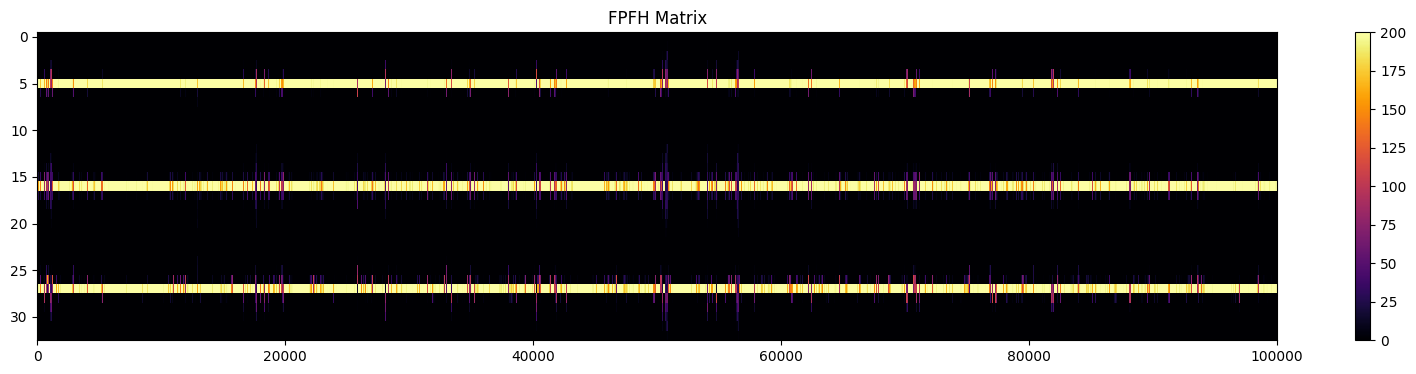

: 

In [113]:
import copy
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

pcd_path = Torso  # Assuming Torso is a file path
pcd = o3d.io.read_point_cloud(pcd_path)
pcd_fpfh = fpfh_matrix(pcd, voxel_size=voxel_downsample)

pcd_fpfh_copy = copy.deepcopy(pcd_fpfh)
fpfh_6th = pcd_fpfh[6, :]
threshold = 125
interesting_points = np.where(fpfh_6th >= threshold)[0]

pcd_log_fpfh = np.log1p(pcd_fpfh)  # Use log1p to handle zero and positive values

# Plot the FPFH matrix with highlighted interesting points
plt.figure(figsize=(20, 4))
plt.imshow(pcd_fpfh, cmap="inferno", aspect='auto')
plt.colorbar()
plt.title("FPFH Matrix")

# Highlight interesting points with a different color
plt.scatter(interesting_points, [6] * len(interesting_points), color='red', marker='o', label='Interesting Points')
plt.legend()
plt.show()

Indexes of lines that remained after removing lines with smaller variances:
[4, 6, 13, 14, 15, 16, 17, 18, 25, 26, 27, 28, 29, 30]


Text(0.5, 1.0, 'Logarithm representation of FPFH Matrix with Highlighted Points')

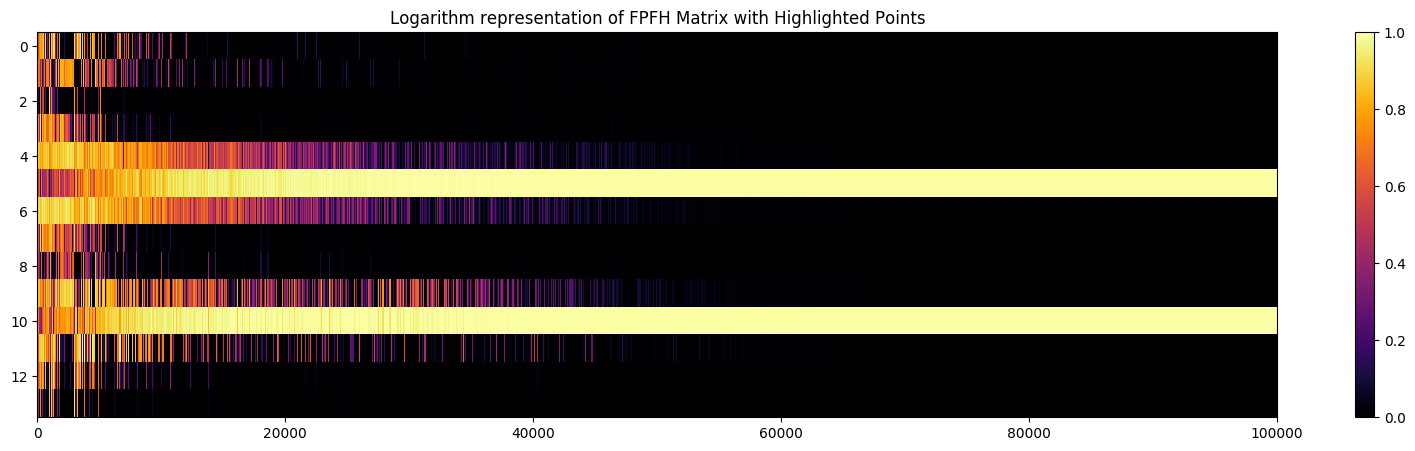

In [112]:
pcd_path = Torso  # Corrected quotes around Torso
pcd = o3d.io.read_point_cloud(pcd_path)
pcd_fpfh = fpfh_matrix(pcd, voxel_size=voxel_downsample)

pcd_log_fpfh = np.log1p(pcd_fpfh)  # Use log1p to handle zero and positive values

# Min-max normalization for each row
pcd_log_fpfh_normalized = (pcd_log_fpfh - np.min(pcd_log_fpfh, axis=1, keepdims=True)) / (np.max(pcd_log_fpfh, axis=1, keepdims=True) - np.min(pcd_log_fpfh, axis=1, keepdims=True))

row_variances = np.var(pcd_log_fpfh_normalized, axis=1)

# Get the indices of lines to remove based on smallest variances
n_lines_to_remove = 19  # Adjust this number as needed
lines_to_remove = np.argsort(row_variances)[:n_lines_to_remove]

# Get the indexes of lines that remained
lines_remained_indexes = [i for i in range(len(pcd_log_fpfh_normalized)) if i not in lines_to_remove]

# Print the indexes of lines that remained
print("Indexes of lines that remained after removing lines with smaller variances:")
print(lines_remained_indexes)

# Remove the lines with smallest variances
pcd_log_fpfh_normalized_removed = np.delete(pcd_log_fpfh_normalized, lines_to_remove, axis=0)

# Normalize the variances to get weights
weights = np.var(pcd_log_fpfh_normalized_removed, axis=1) / np.sum(np.var(pcd_log_fpfh_normalized_removed, axis=1))

# Compute the weighted sum of each column
weighted_sums = np.dot(weights, pcd_log_fpfh_normalized_removed)

# Sort the columns based on the weighted sums
sorted_indices = np.argsort(weighted_sums)[::-1]  # Descending order
sorted_matrix = pcd_log_fpfh_normalized_removed[:, sorted_indices]

# Plot the highlighted matrix using the custom colormap
plt.figure(figsize=(20, 5))
plt.imshow(sorted_matrix, cmap="inferno", aspect='auto')
plt.colorbar()
plt.title("Logarithm representation of FPFH Matrix with Highlighted Points")


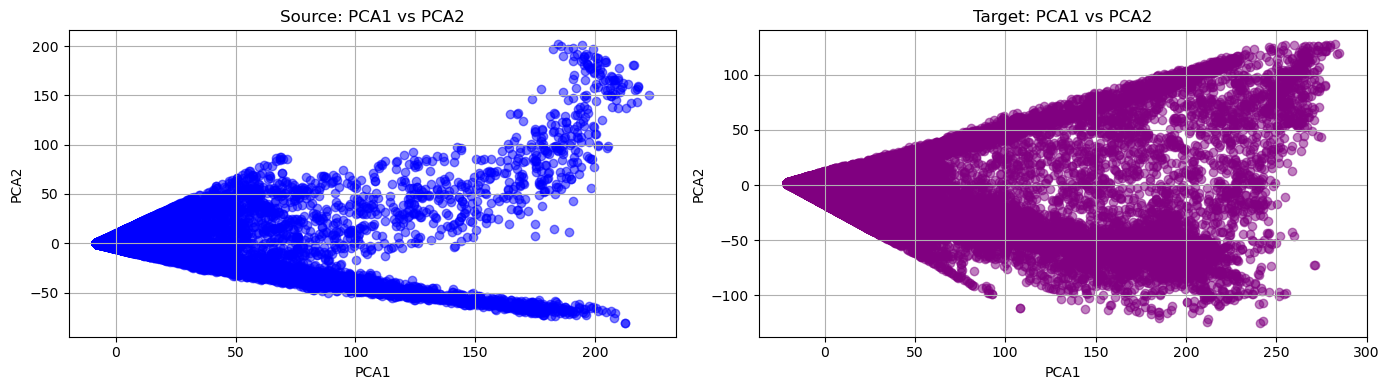

In [1]:
import features_explore
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import open3d as o3d
BREAST = "Manequin/Mannequin_Breast_ASCII.ply"
FASCIA = "Manequin/Mannequin_Fascia_ASCII.ply"
TORSO = "Manequin/Mannequin_Torso_ASCII.ply"
VOXEL_SIZE = 0.01


source = o3d.io.read_point_cloud(BREAST)
target = o3d.io.read_point_cloud(TORSO)


# Apply PCA to the source and target data
source_reduced_pca = features_explore.retain_90_percent_variance(source, VOXEL_SIZE)
target_reduced_pca = features_explore.retain_90_percent_variance(target, VOXEL_SIZE)

# Number of features after PCA
n_features = source_reduced_pca.shape[1]

# Create a figure with subplots arranged in 2 columns
all_combinations = list(combinations(range(n_features), 2))
n_combinations = len(all_combinations)
fig, axs = plt.subplots(n_combinations, 2, figsize=(14, 4 * n_combinations))

# Check if axs is a 1D array and reshape if needed
if n_combinations == 1:
    axs = np.array([axs])  # Convert to 2D array with one row

# Iterate over each combination and plot
for idx, (i, j) in enumerate(all_combinations):
    # Extract PCA components
    pca1_source = source_reduced_pca[:, i]
    pca2_source = source_reduced_pca[:, j]
    pca1_target = target_reduced_pca[:, i]
    pca2_target = target_reduced_pca[:, j]
    
    # Source plot
    axs[idx, 0].scatter(pca1_source, pca2_source, color='blue', alpha=0.5)
    axs[idx, 0].set_title(f'Source: PCA{i+1} vs PCA{j+1}')
    axs[idx, 0].set_xlabel(f'PCA{i+1}')
    axs[idx, 0].set_ylabel(f'PCA{j+1}')
    axs[idx, 0].grid(True)
    
    # Target plot
    axs[idx, 1].scatter(pca1_target, pca2_target, color='purple', alpha=0.5)
    axs[idx, 1].set_title(f'Target: PCA{i+1} vs PCA{j+1}')
    axs[idx, 1].set_xlabel(f'PCA{i+1}')
    axs[idx, 1].set_ylabel(f'PCA{j+1}')
    axs[idx, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Compare point clouds using a transforation if needed

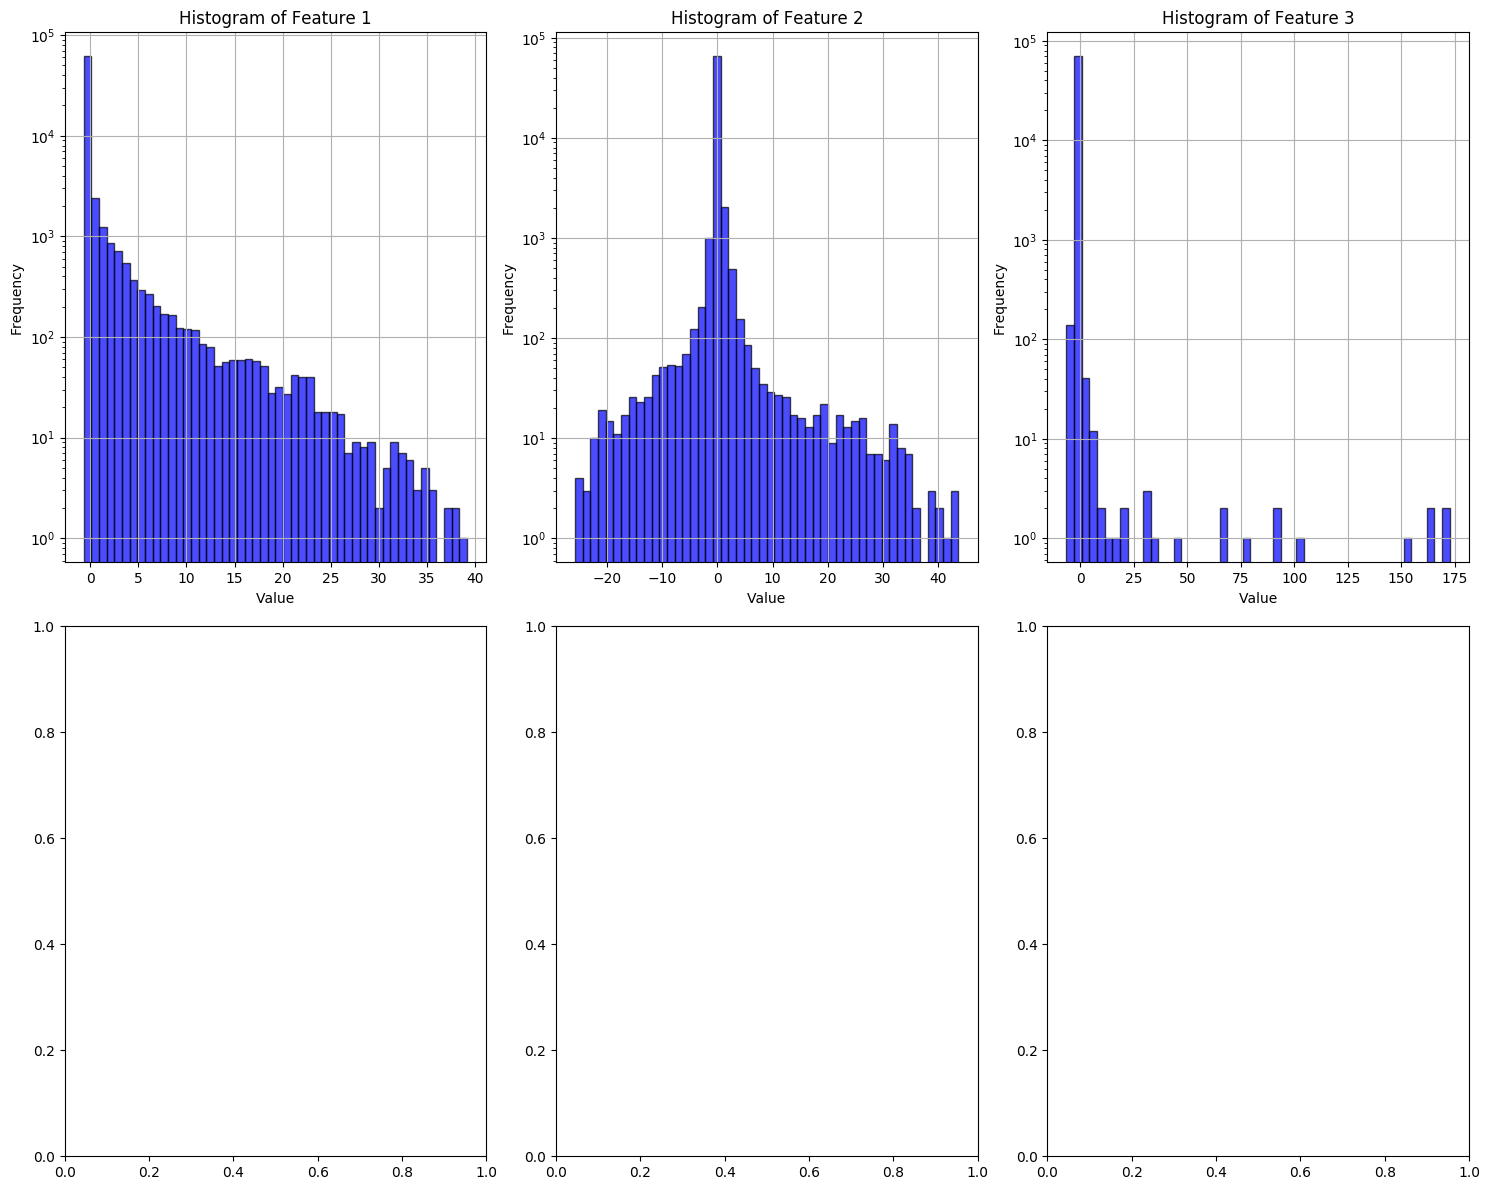

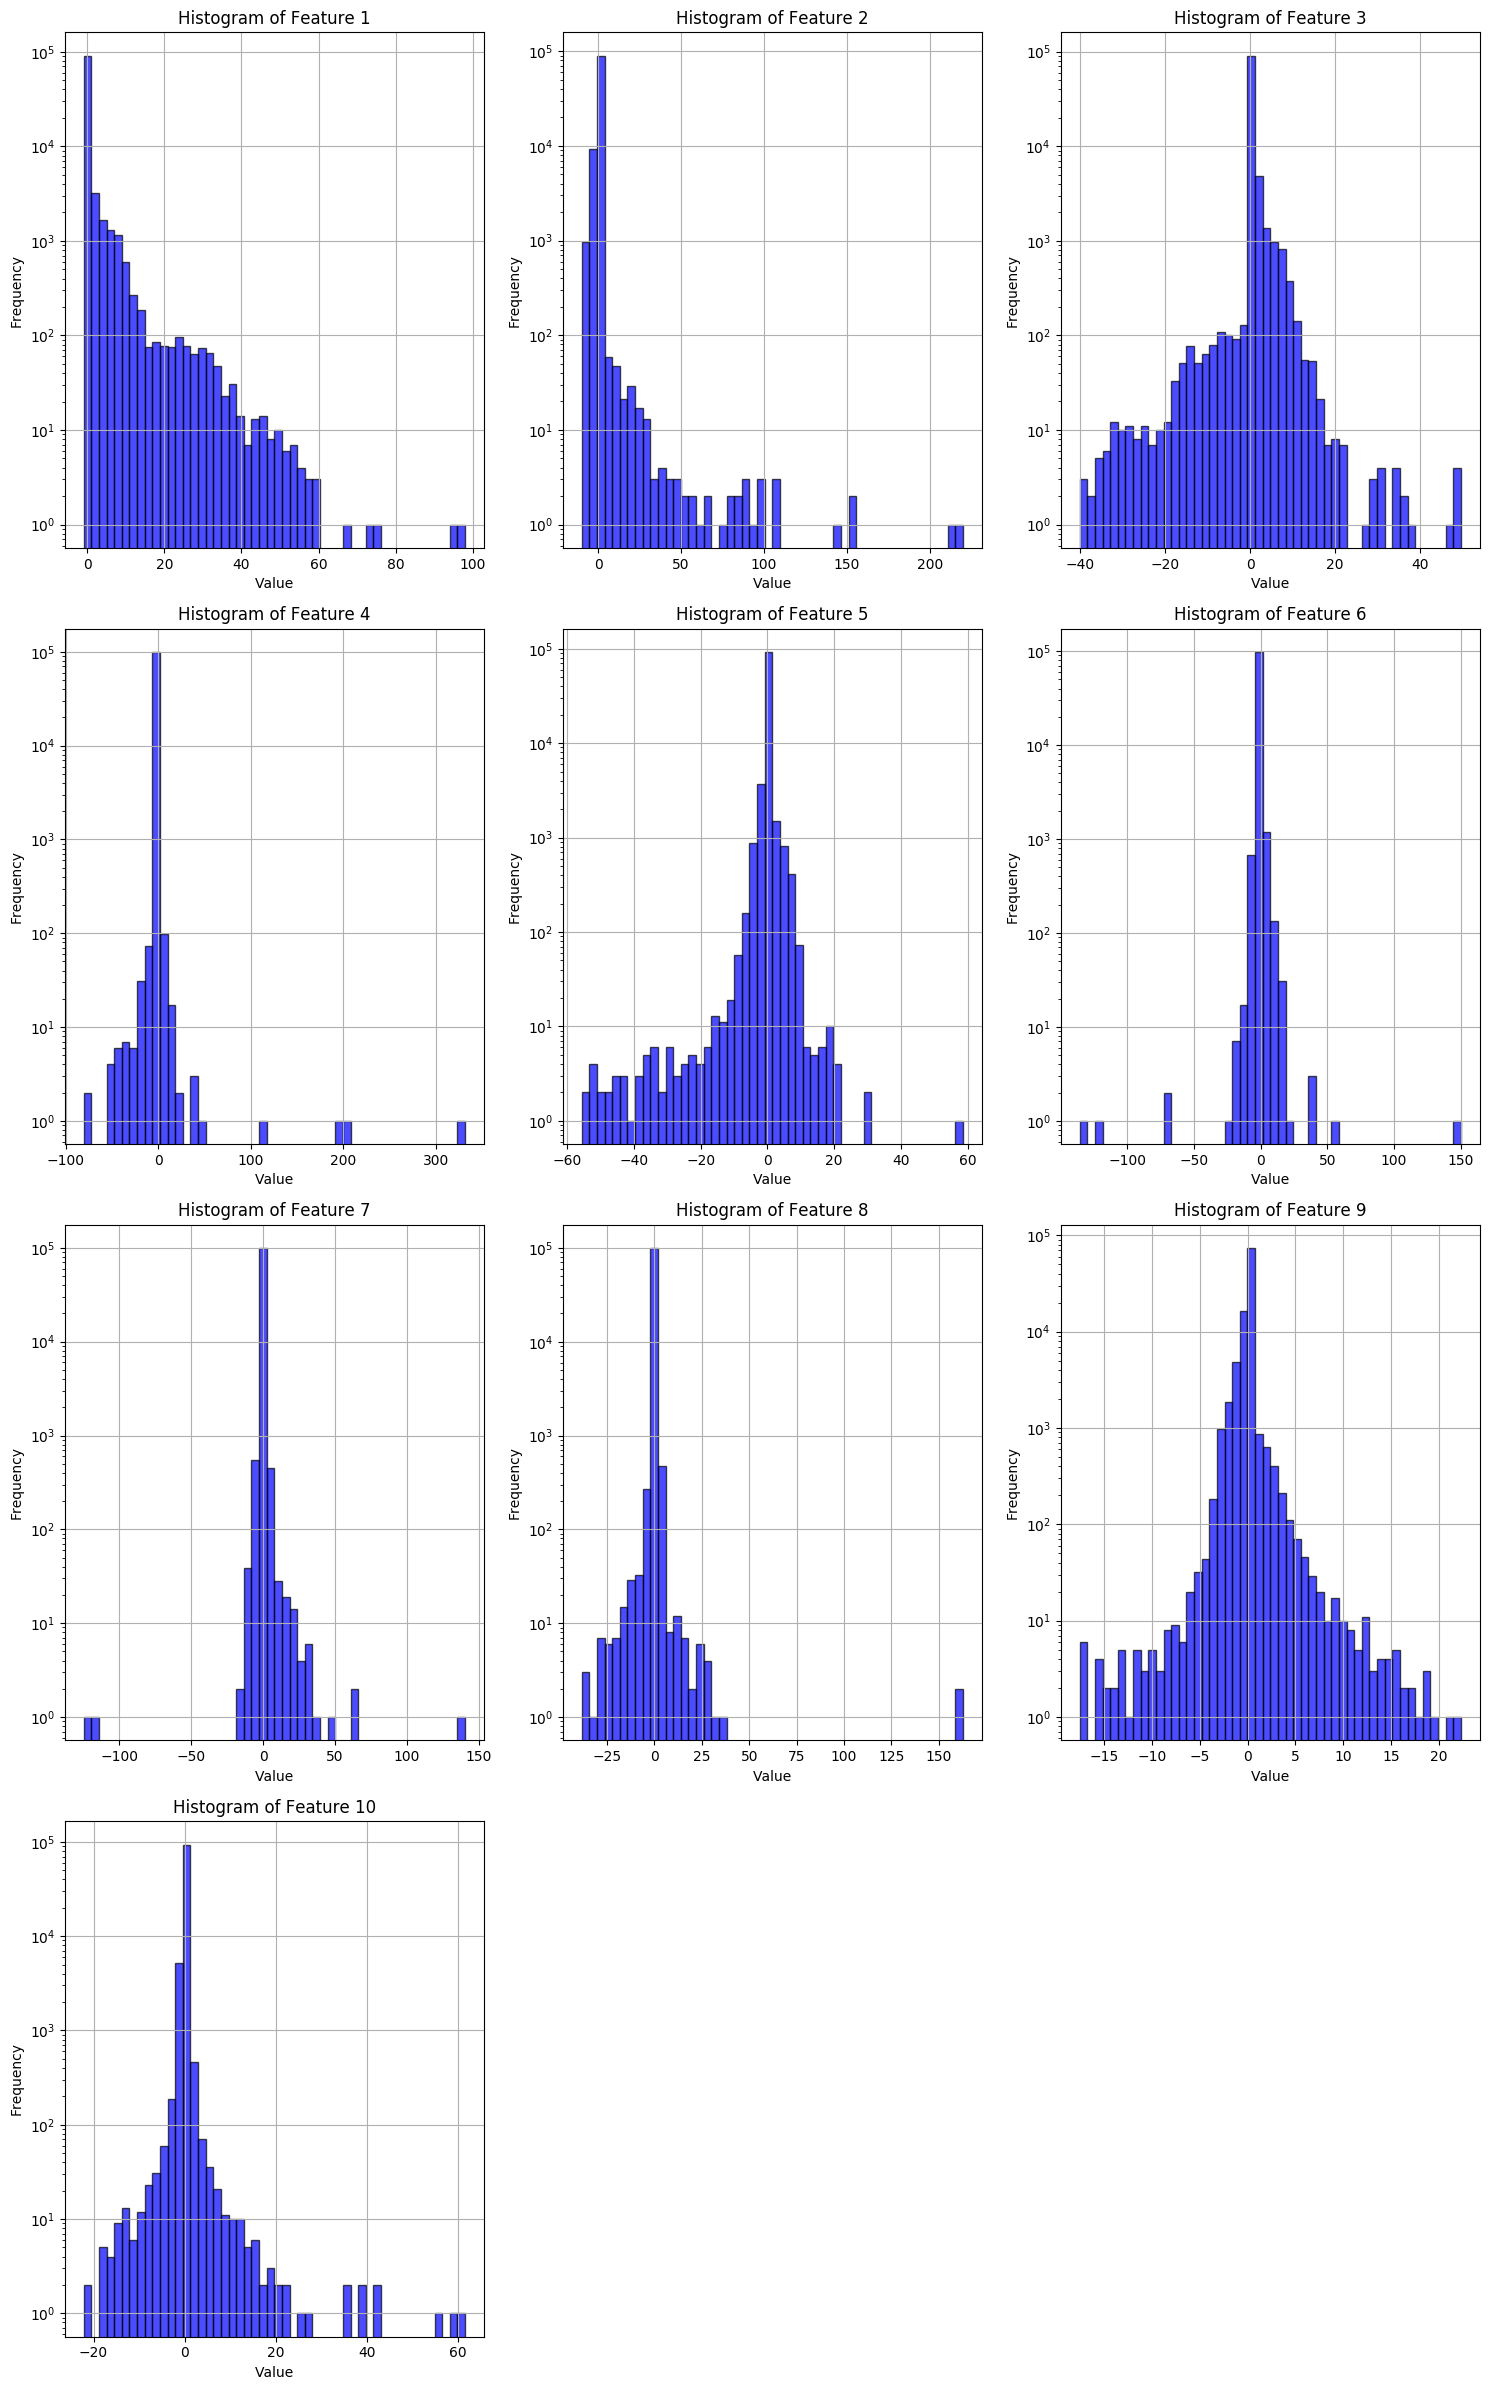

In [26]:
for X_reduced in Xs:      
    num_features = len(X_reduced)
    num_rows = num_features // 3 + (1 if num_features % 3 != 0 else 0)  # Number of rows

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 6*num_rows))

    for i, feature in enumerate(X_reduced):
        row = i // 3
        col = i % 3

        if row < num_rows - 1 or col < num_features % 3:
            axes[row, col].hist(feature, bins=50, color='blue', edgecolor='black', alpha=0.7)
            axes[row, col].set_xlabel('Value')
            axes[row, col].set_ylabel('Frequency')
            axes[row, col].set_title('Histogram of Feature {}'.format(i+1))
            axes[row, col].grid(True)
            axes[row, col].set_yscale('log')

    # Remove empty subplots
    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

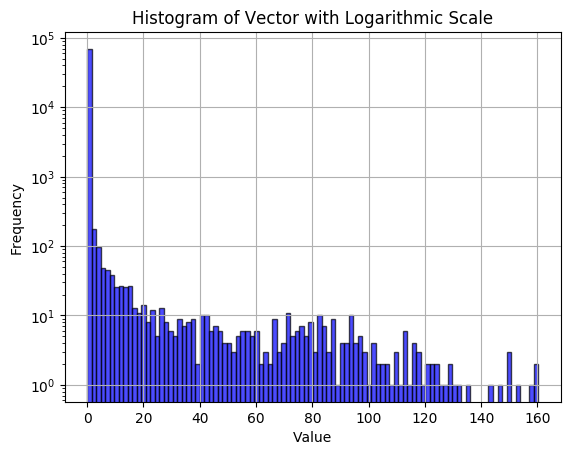

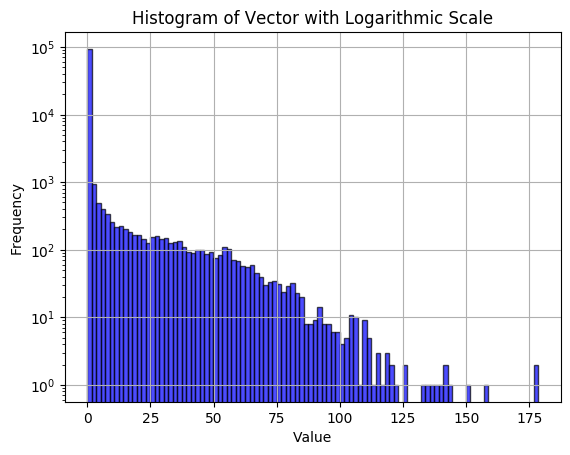

In [27]:
X_6s = [fpfh_6th_source.T, fpfh_6th_target.T]

for X in X_6s:
    plt.hist(X, bins=100, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Vector with Logarithmic Scale')
    plt.grid(True)
    plt.yscale('log')  # Setting y-axis to logarithmic scale
    plt.show()

In [8]:
import features_explore
import open3d as o3d
BREAST = "Manequin/Mannequin_Breast_ASCII.ply"
FASCIA = "Manequin/Mannequin_Fascia_ASCII.ply"
TORSO = "Manequin/Mannequin_Torso_ASCII.ply"
VOXEL_SIZE = 0.01


source = o3d.io.read_point_cloud(BREAST)
target = o3d.io.read_point_cloud(TORSO)

source_6th = features_explore.features_selection(source, VOXEL_SIZE, [6]) #aqui
target_6th = features_explore.features_selection(target, VOXEL_SIZE, [6])



In [9]:
import numpy as np
import correspondence_rigid as cr
import copy

cluster_1_source, cluster_1_target, cluster_2_source, cluster_2_target = cr.select_clusters_based_on_histogram(100, target_6th, source_6th, print_shapes=True)

transformation = cr.rigid_registration_manequim(source, target, VOXEL_SIZE, VOXEL_SIZE * 2, visualize_rigid_transformation=False)

source.transform(transformation)
threshold = 0.02  
correspondence_set = cr.evaluation_function(source, target, threshold)

source_points = np.asarray(source.points)
target_points = np.asarray(target.points)

source_points_selected = source_points[cluster_2_source]
target_points_selected = target_points[cluster_2_target]

source_cloud = o3d.geometry.PointCloud()
source_cloud.points = o3d.utility.Vector3dVector(source_points)
source_cloud.colors = o3d.utility.Vector3dVector(np.array([[1, 1, 0] for _ in range(len(source_points))]))  # Yellow

target_cloud = o3d.geometry.PointCloud()
target_cloud.points = o3d.utility.Vector3dVector(target_points)
target_cloud.colors = o3d.utility.Vector3dVector(np.array([[0, 0, 1] for _ in range(len(target_points))]))  # Blue

source_selected_cloud = o3d.geometry.PointCloud()
source_selected_cloud.points = o3d.utility.Vector3dVector(source_points_selected)
source_selected_cloud.colors = o3d.utility.Vector3dVector(np.array([[0, 0, 0] for _ in range(len(source_points_selected))]))  # Red

target_selected_cloud = o3d.geometry.PointCloud()
target_selected_cloud.points = o3d.utility.Vector3dVector(target_points_selected)
target_selected_cloud.colors = o3d.utility.Vector3dVector(np.array([[1, 0.5, 0.5] for _ in range(len(target_points_selected))]))  # Pink

# Visualize all point clouds
o3d.visualization.draw_geometries([source_selected_cloud, target_selected_cloud])

Cluster sizes:
Cluster 1 Source: (69939,)
Cluster 2 Source: (52,)
Cluster 1 Target: (99954,)
Cluster 2 Target: (70,)
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


Cluster sizes:
Cluster 1 Source: (69939,)
Cluster 2 Source: (52,)
Cluster 1 Target: (99954,)
Cluster 2 Target: (70,)


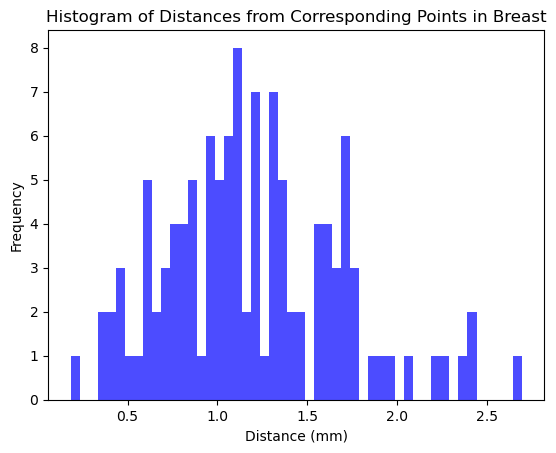

In [12]:

import correspondence_rigid as cr
import matplotlib.pyplot as plt
cluster_1_source, cluster_1_target, cluster_2_source, cluster_2_target = cr.select_clusters_based_on_histogram(100, target_6th, source_6th, print_shapes=True)
transformation = cr.rigid_registration_manequim(source, target, VOXEL_SIZE, VOXEL_SIZE * 2, visualize_rigid_transformation=False)

source.transform(transformation)
threshold = 0.02  
correspondence_set = cr.evaluation_function(source, target, threshold)

filtered_correspondence_set = cr.filtered_correspondence_set_based_on_clusters(cluster_2_source, cluster_2_target, correspondence_set)

distances = []
for source_index, target_index in filtered_correspondence_set:
    source_point = np.asarray(source.points)[source_index]
    target_point = np.asarray(target.points)[target_index]
    distance = np.linalg.norm(source_point - target_point) * 1000
    distances.append(distance)

# Plot histogram of distances
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Distances from Corresponding Points in Breast')
plt.xlabel('Distance (mm)')
plt.ylabel('Frequency')
plt.show()

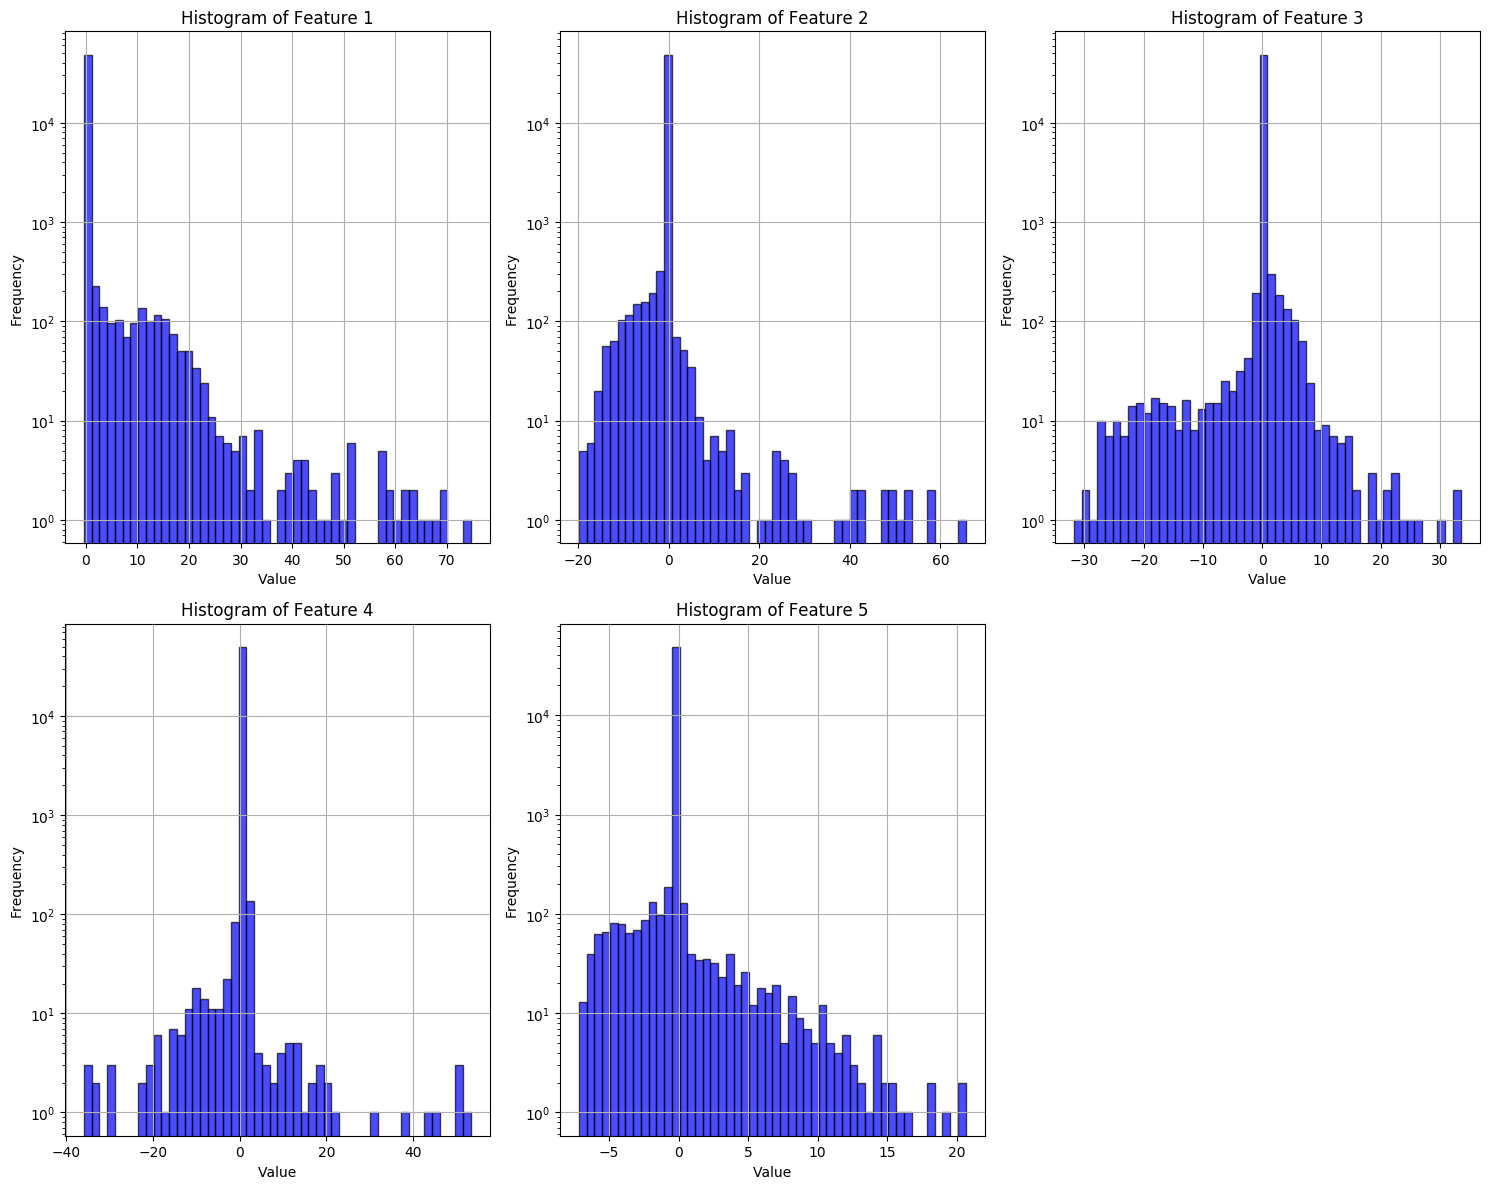

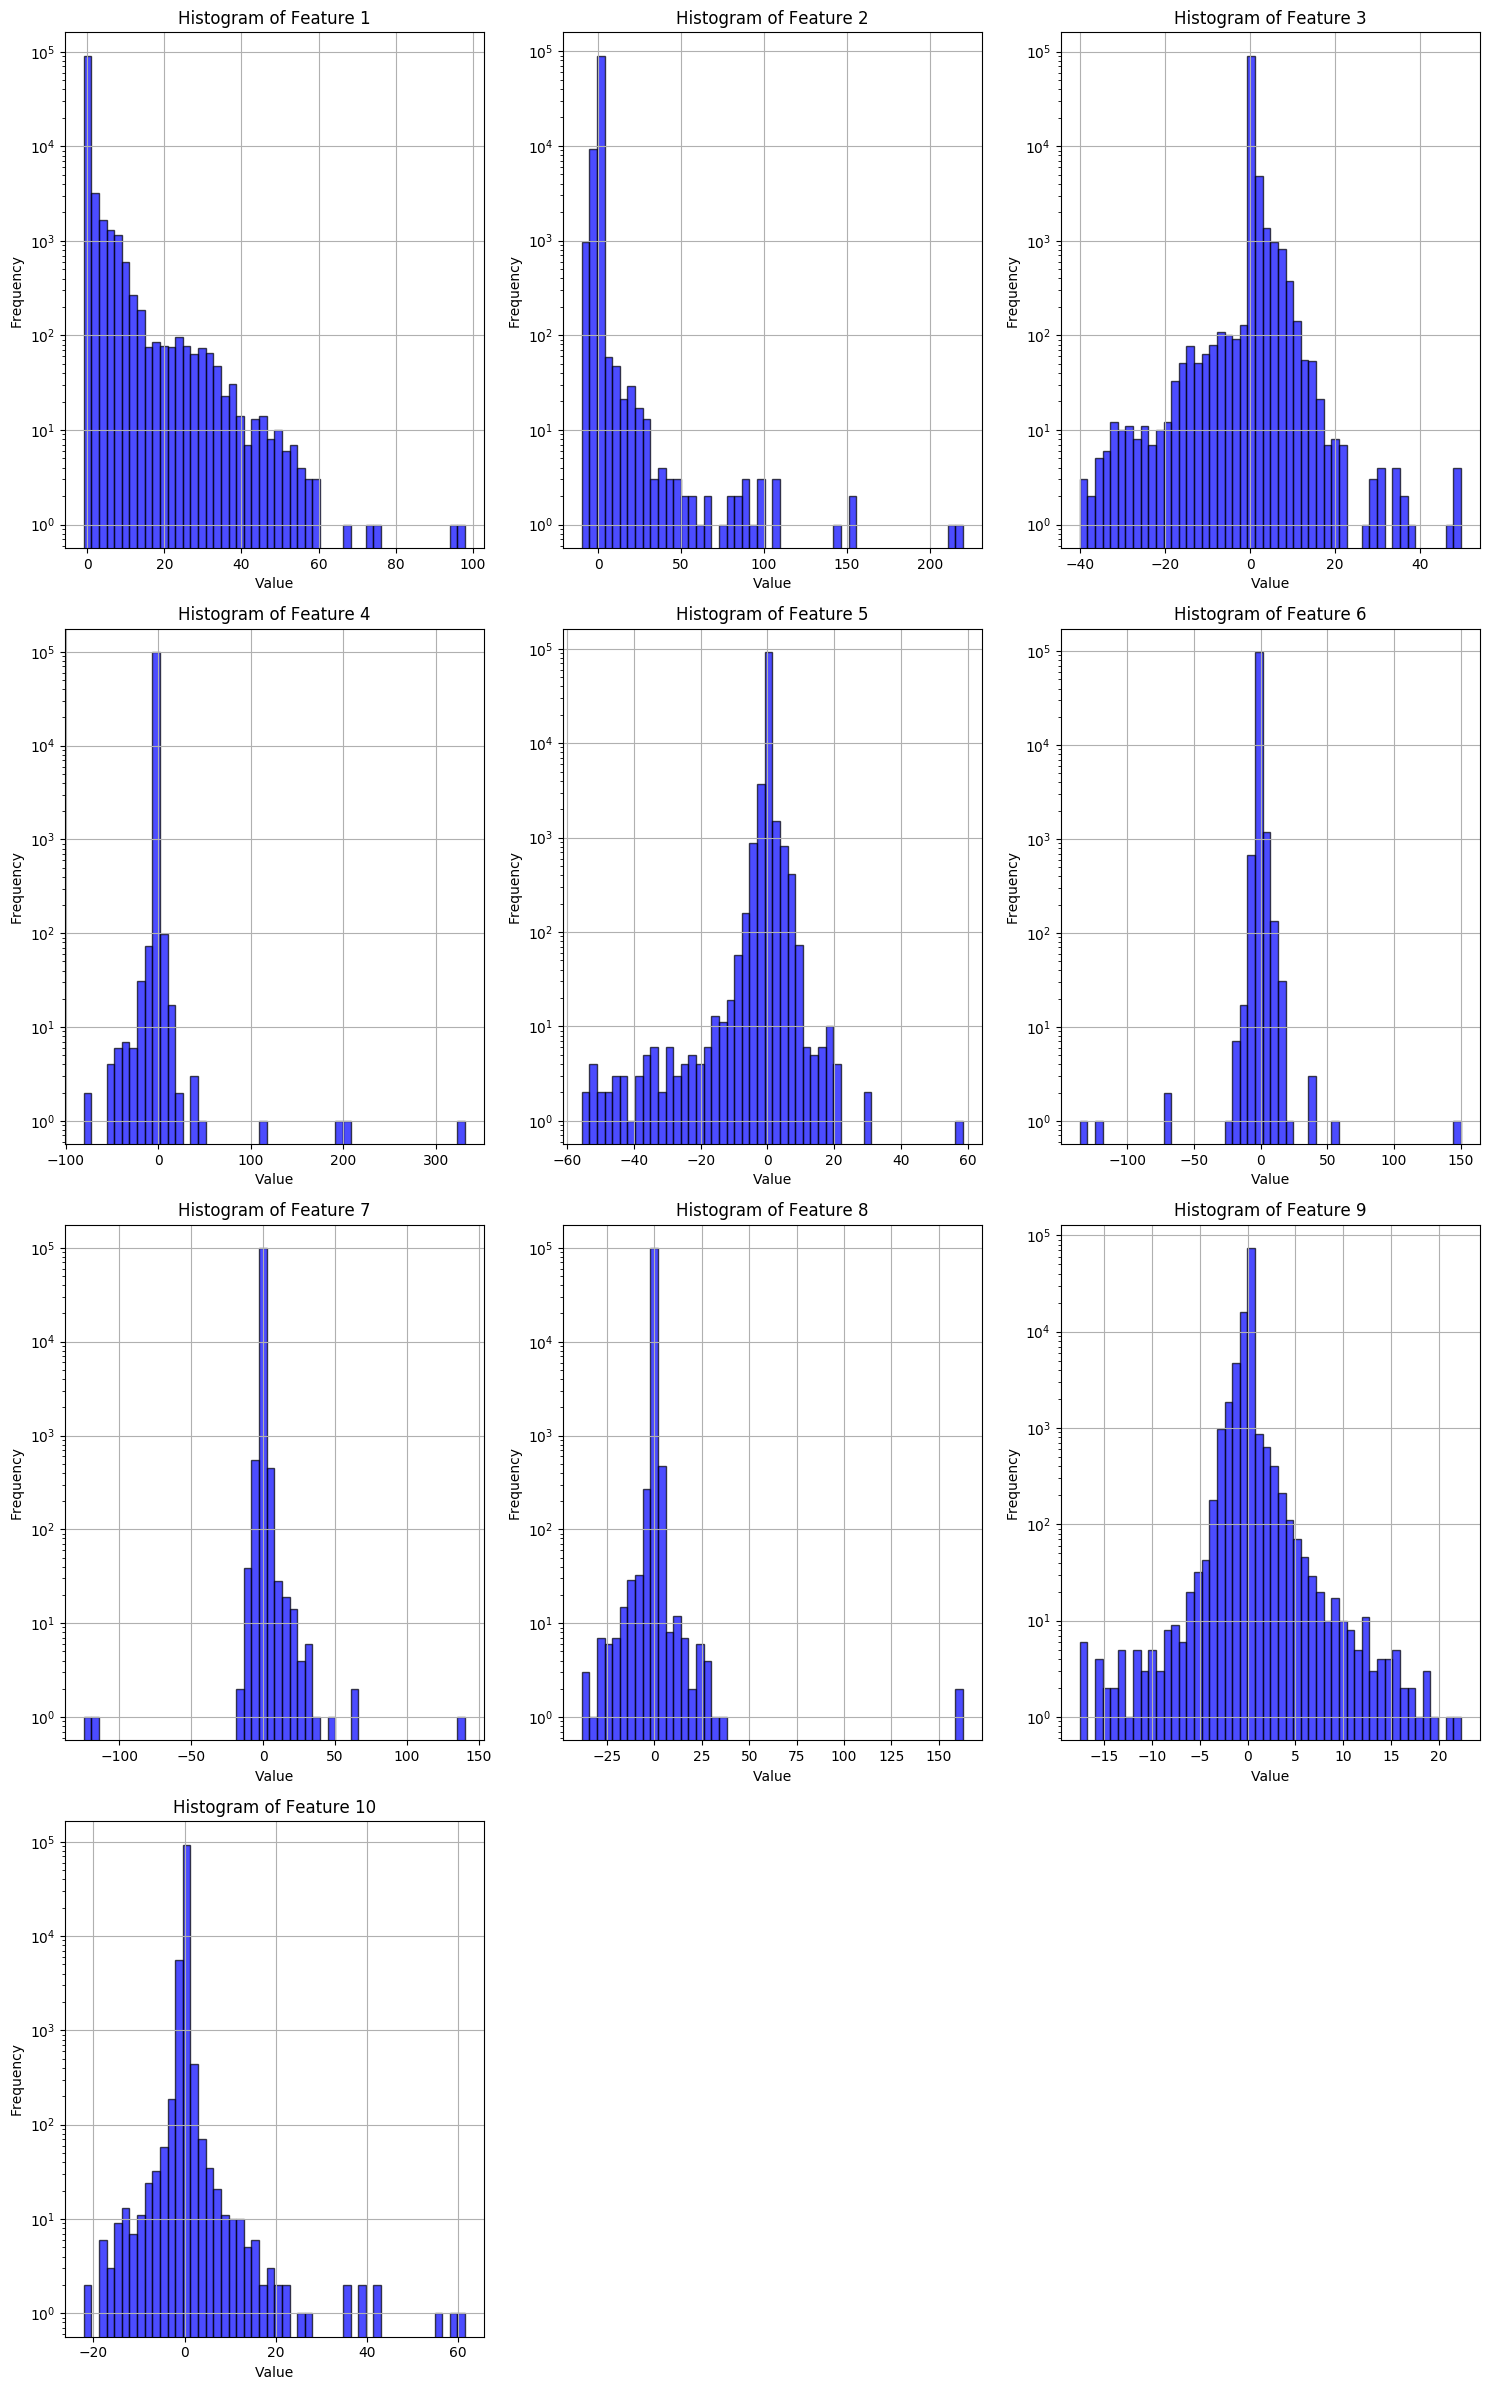

In [33]:
for X_reduced in Xs:      
    num_features = len(X_reduced)
    num_rows = num_features // 3 + (1 if num_features % 3 != 0 else 0)  # Number of rows

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 6*num_rows))

    for i, feature in enumerate(X_reduced):
        row = i // 3
        col = i % 3

        if row < num_rows - 1 or col < num_features % 3:
            axes[row, col].hist(feature, bins=50, color='blue', edgecolor='black', alpha=0.7)
            axes[row, col].set_xlabel('Value')
            axes[row, col].set_ylabel('Frequency')
            axes[row, col].set_title('Histogram of Feature {}'.format(i+1))
            axes[row, col].grid(True)
            axes[row, col].set_yscale('log')

    # Remove empty subplots
    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

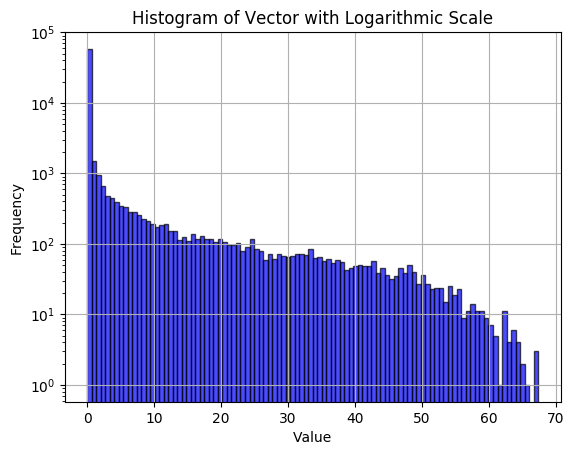

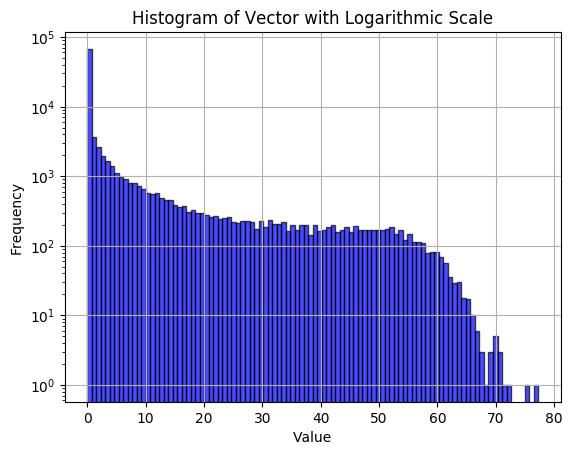

In [34]:
X_28s = [fpfh_28th_source.T, fpfh_28th_target.T]

for X in X_6s:
    plt.hist(X, bins=100, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Vector with Logarithmic Scale')
    plt.grid(True)
    plt.yscale('log')  # Setting y-axis to logarithmic scale
    plt.show()

21/05

In [4]:
# nipples_idx = [25832, 25833, 28640, 28641, 30549, 40308, 40313, 40315, 40316, 40317, 40318, 40320, \
#                40321, 40322, 40323, 40324, 40326, 40327, 40333, 54466, 54471, 54472, 62170, 62171, \
#                 62176, 62241, 62247, 75170, 75172, 75221, 75222, 75223, 75226, 75235, 75240, 75242, \
#                     75243, 75244, 75270, 75271, 75273, 75274, 75275, 75276, 75279, 75288, 75290, 75291, \
#                         75297, 75305, 75306, 89758, 89773, 89779, 89780, 89791, 89796, 89805, 89808, 89814, \
#                             89815, 89834, 89885, 89932, 89936, 89950, 89987, 89999, 99950, 99966]

In [5]:

original_row = 6

pcds_fpfh = f.fpfh_matrix(pcds, voxel_size=voxel_downsample)

# pcds_normalized = f.global_normalization(pcds_fpfh)
pcds_normalized = f.normalize_fpfh(pcds_fpfh)
print("Here")
pcds_log = f.log_transform(pcds_normalized)

pcds_filtered, remaining_indexes, new_rows = f.remove_low_variance_rows(pcds_log, [0.001, 0.00015], original_row)

pcds_weighted, sorted_indices = f.sort_by_variance(pcds_filtered)

nipples_indexes = f.nipples(pcds_fpfh, 125)

nipple_sorted_indices = f.sorted_interesting_points(nipples_indexes, sorted_indices)


/Users/duartealmeida/Liane_stuff/Volumetric-Correction/features_explore.py:94: RuntimeWarning: invalid value encountered in true_divide
  normalized = matrix / row_max


Here
Indexes of lines that remained after removing lines with smaller variances:
[ 4  5  6 13 14 15 16 17 18 26 27 28 29 30]
Indexes of lines that remained after removing lines with smaller variances:
[ 4  5  6 14 15 16 17 18 25 26 27 28 29]


[(33, 100024), (33, 69991), (33, 100024), (33, 69991), (33, 100024), (33, 69991), (14, 100024), (13, 69991), (14, 100024), (13, 69991)]


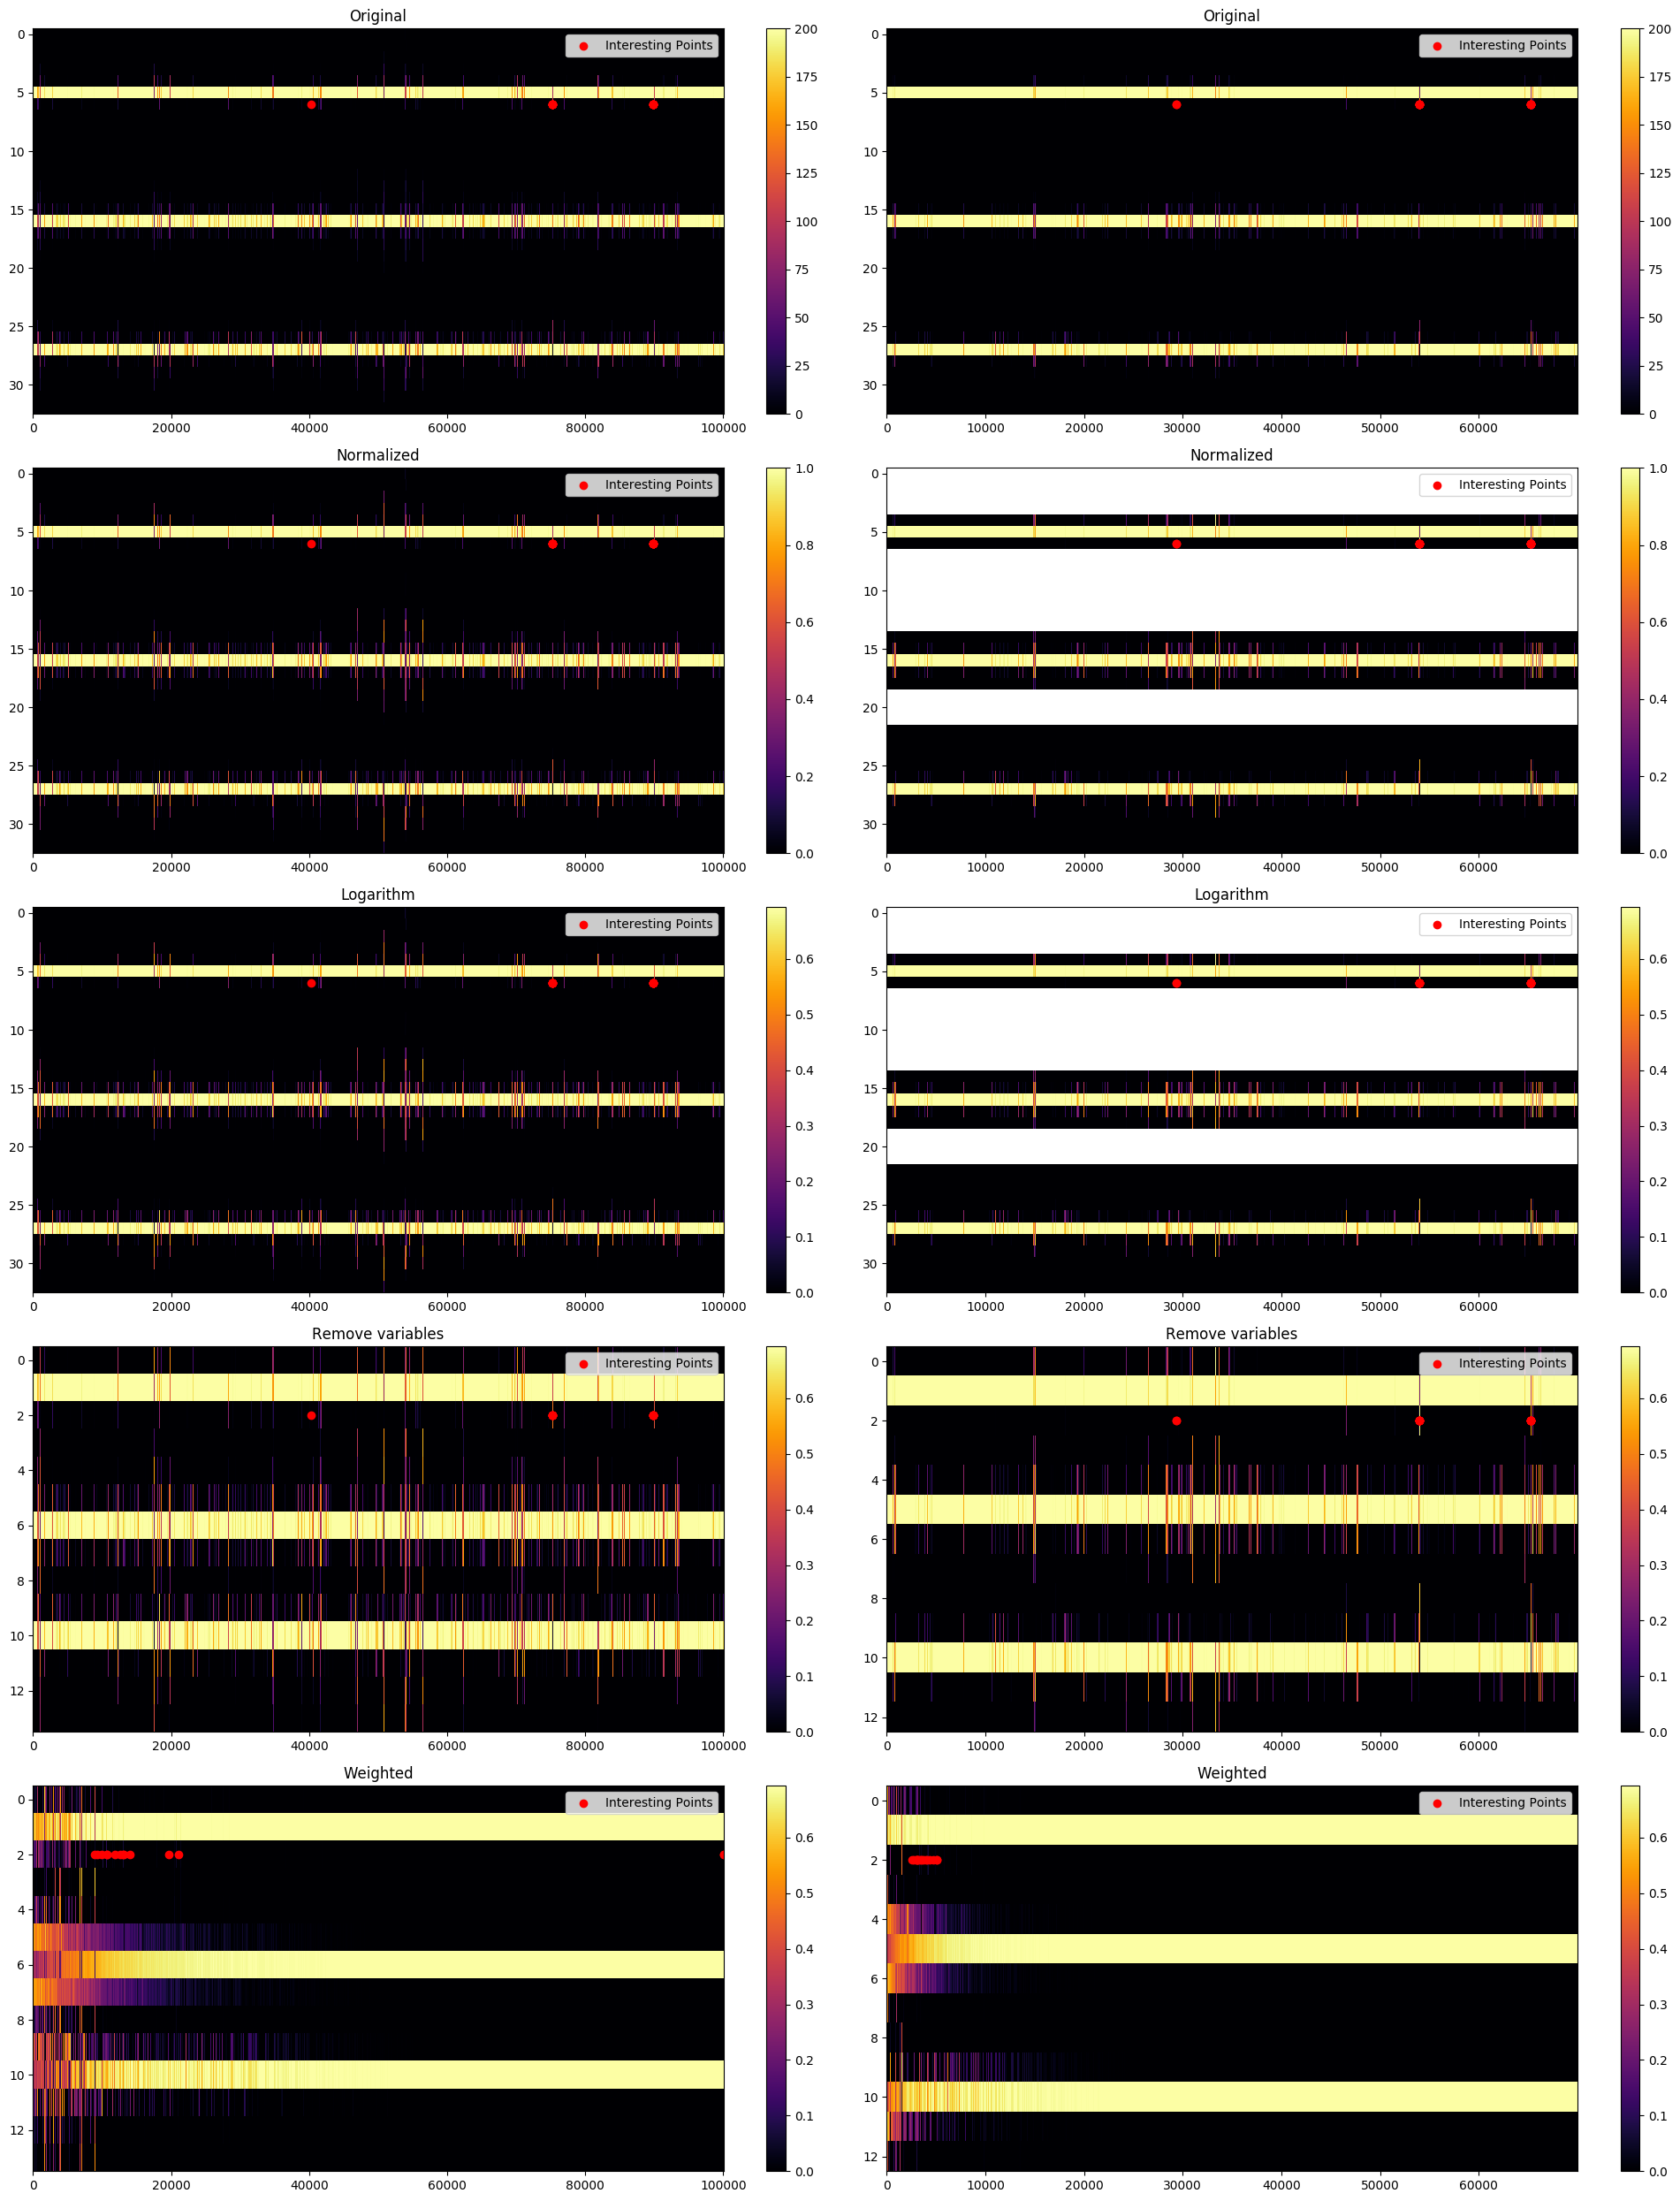

In [6]:
matrix = pcds_fpfh + pcds_normalized + pcds_log + pcds_filtered + pcds_weighted
matrices_names = ["Original", "Original", "Normalized", "Normalized", "Logarithm","Logarithm", "Remove variables", "Remove variables", "Weighted", "Weighted"]
new_rows_list = [original_row for _ in range(6)] + new_rows + new_rows
nipples_indexes_list = nipples_indexes * 4 + nipple_sorted_indices * 1

print([matrix[i].shape for i in range(len(matrix))])

f.plot_matrices_side_by_side(matrix, matrices_names, nipples_indexes_list, new_rows_list)


In [8]:
f.higher_variance_rows_sorted(pcds_fpfh, "Original")

f.higher_variance_rows_sorted(pcds_normalized, "Normalized")

f.higher_variance_rows_sorted(pcds_log, "log")

f.higher_variance_rows_sorted(pcds_filtered, "Remove Variables", remaining_indexes=remaining_indexes)

f.higher_variance_rows_sorted(pcds_weighted, "Weighted", remaining_indexes=remaining_indexes)




Original 1 
[27 16 26  5 28 15 17  4  6 29 25 18 14 30  3 13 19 24  7 31 23 12 20  2
 10 21  1  0 32  8 11 22  9]
Original 2 
[16 27 26 28 17 15  5  6  4 25 29 18 14 24 30 23 31 32 22 19 13 12 11 10
  9  8  7 20 21  3  2  1  0]
Normalized 1 
[27 16 26  5 28 15 17  4  6 29 25 18 14 30  3 13 19 24  7 31 23 12 20  2
 10 21  1  0 32  8 11 22  9]
Normalized 2 
[16 27 26 28 17 15  5  6  4 25 29 18 14 24 30 23 31 32 22 19 13 12 11 10
  9  8  7 20 21  3  2  1  0]
log 1 
[27 16 26 28 15 17  5  4  6 29 25 18 14 30  3 13 19 24  7 31 12 23 20  2
 10 21  1  0 32  8 11 22  9]
log 2 
[26 27 16 28 17 15  6  5  4 25 29 18 14 24 30 23 31 32 22 19 13 12 11 10
  9  8  7 20 21  3  2  1  0]
Remove Variables 1 
[27, 16, 26, 28, 15, 17, 5, 4, 6]
Remove Variables 2 
[26, 27, 16, 28, 17, 15, 6, 5, 4]
Weighted 1 
[27, 16, 26, 28, 15, 17, 5, 4, 6]
Weighted 2 
[26, 27, 16, 28, 17, 15, 6, 5, 4]


[array([7, 4, 6, 8, 3, 5, 1, 0, 2]), array([6, 7, 4, 8, 5, 3, 2, 1, 0])]

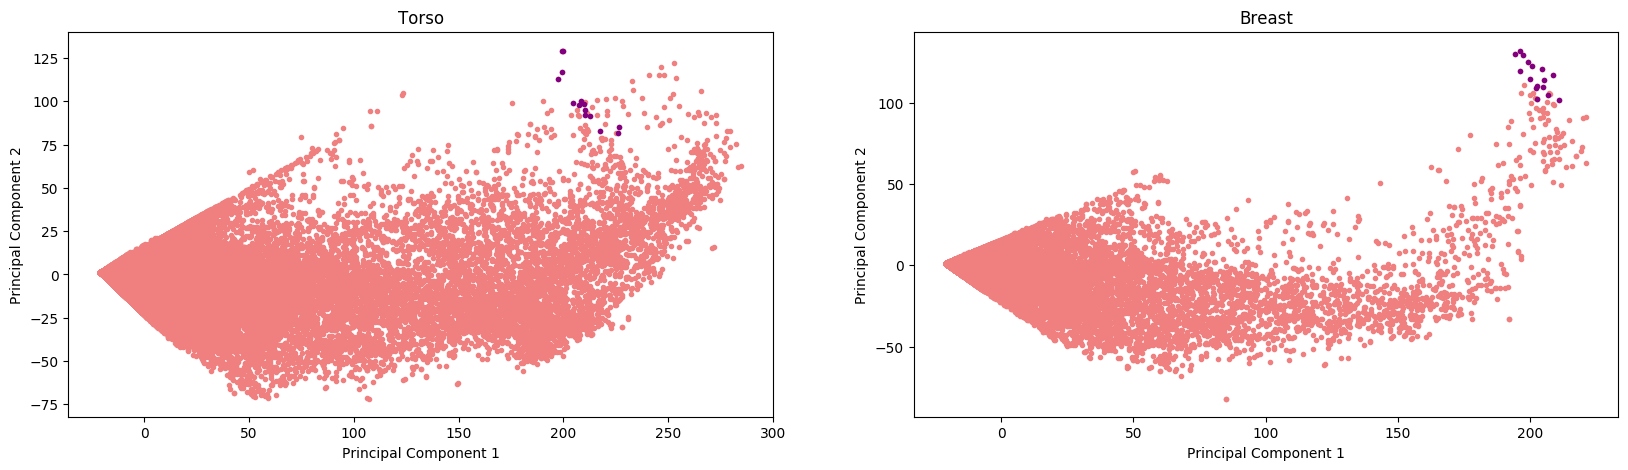

In [10]:
pca_matrix = f.apply_pca(pcds_fpfh, nipples_indexes, ["Torso", "Breast"], [0, 2])

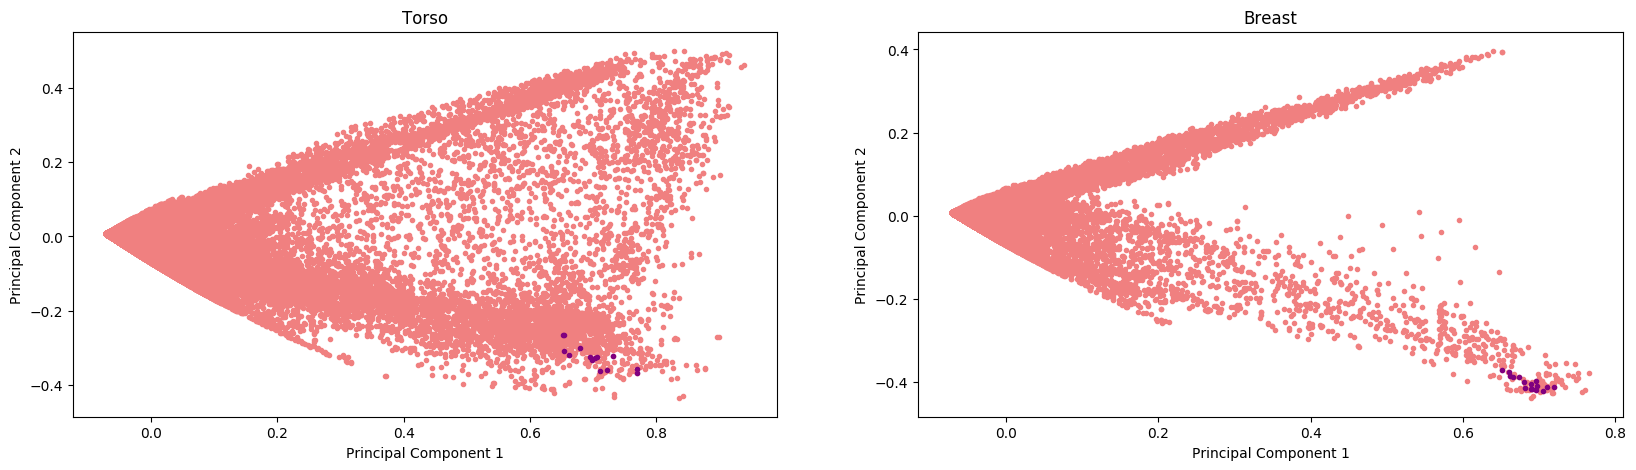

In [11]:
pca_matrix = f.apply_pca(pcds_weighted, nipple_sorted_indices,  ["Torso", "Breast"], [0,1])

Didn´t improved the results. 
It's possible if the normalization for the torso and breast would be done with the same parameters would have more similar results. However the next steps are going to be done with the original matrix of features, since there is not much difference in the results.

        Scatter plot feature i against feature j

In [1]:
import features_explore as f
import open3d as o3d
from mpl_toolkits.mplot3d import Axes3D

Breast = "Rigid_Registration/Manequin/Mannequin_Breast_ASCII.ply"
Fascia = "Rigid_Registration/Manequin/Mannequin_Fascia_ASCII.ply"
Torso = "Rigid_Registration/Manequin/Mannequin_Torso_ASCII.ply"
voxel_downsample = 0.01

pcds_paths = [Torso, Breast]

pcds = []
for pcd_path in pcds_paths:
    pcd = o3d.io.read_point_cloud(pcd_path)
    pcds.append(pcd)

pcds_fpfh = f.fpfh_matrix(pcds, voxel_size=voxel_downsample)
nipples_indexes = f.nipples(pcds_fpfh, 100)

Original 1 
[27 16 26  5 28 15 17  4  6 29 25 18 14 30  3 13 19 24  7 31 23 12 20  2
 10 21  1  0 32  8 11 22  9]
Original 2 
[16 27 26 28 17 15  5  6  4 25 29 18 14 24 30 23 31 32 22 19 13 12 11 10
  9  8  7 20 21  3  2  1  0]


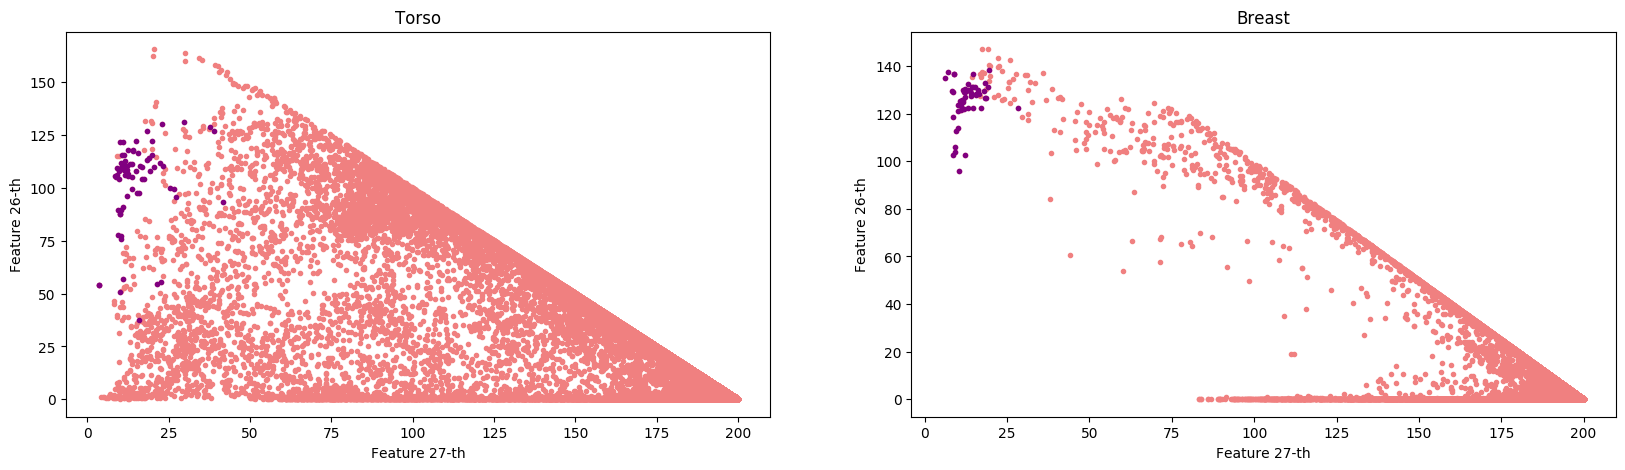

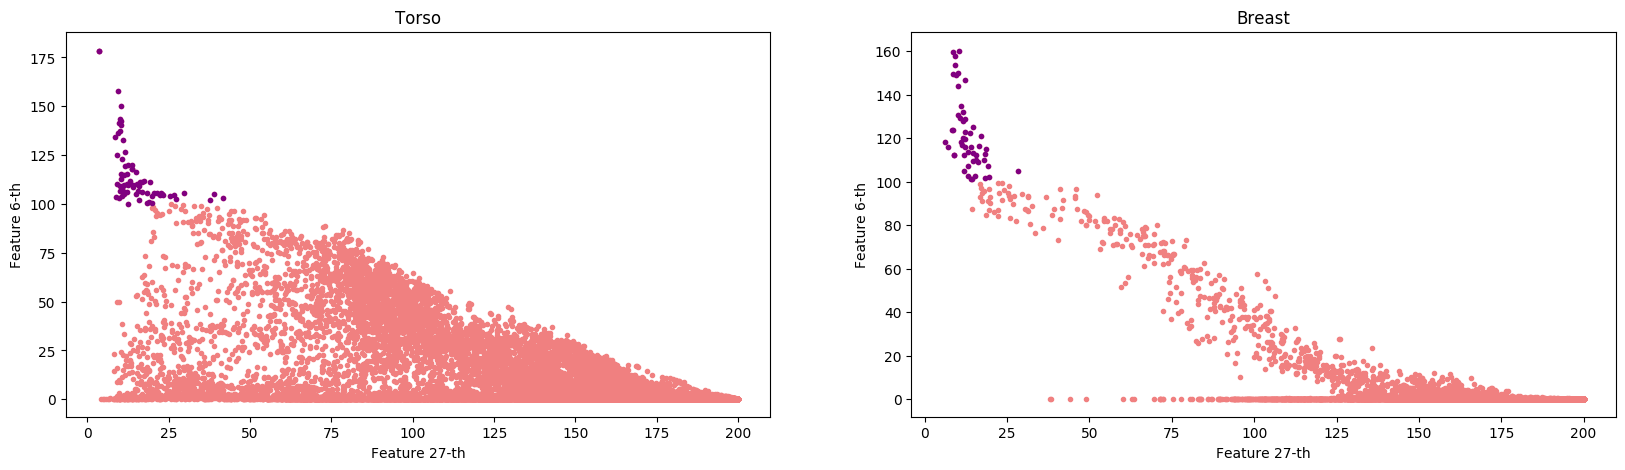

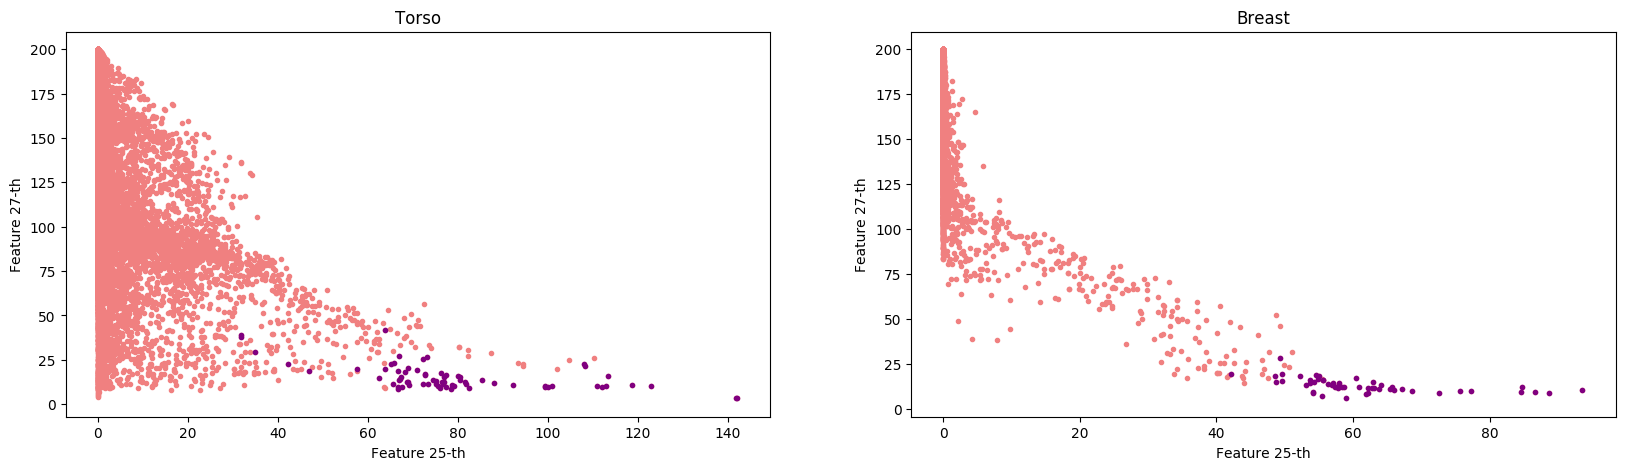

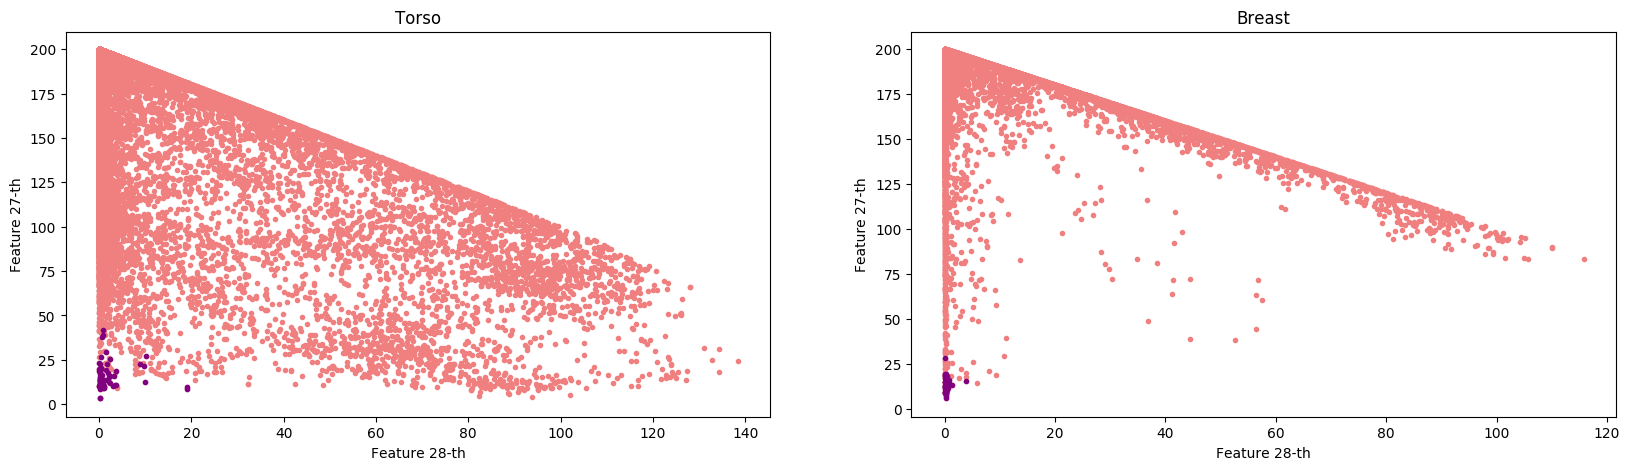

In [ ]:
f.higher_variance_rows_sorted(pcds_fpfh, "Original")
f.features_against_features(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[27,26])
f.features_against_features(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[27,6])
f.features_against_features(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[25,27])
f.features_against_features(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[28,27])

In [ ]:
f.features_against_features_3d(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[28,27,25])
f.features_against_features_3d(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[16,28,25])
f.features_against_features_3d(pcds_fpfh, ["Torso", "Breast"], nipples_indexes,[6,27,26])